# Getting Started with Pandas and GeoPandas

## Introduction 
`Pandas` is a python library for data analysis. It provides high-performance data structures and data analysis tools.

`GeoPandas` extends the datatypes used by `pandas` to allow spatial operations on geometric types.

- `Pandas` have tools for importing and exporting data from different formats: comma-separated value (CSV), text files, Microsoft Excel, SQL databases, and the fast HDF5 format.
- `GeoPandas` reads data from file formats containing both data and geometry, e.g. GeoPackage, GeoJSON, Shapefile.

For more information see [Pandas](https://pandas.pydata.org/pandas-docs/stable/user_guide/10min.html) and [GeoPandas](https://geopandas.readthedocs.io/en/latest/getting_started/introduction.html).

These exercises will provide an introduction to many `Pandas` and `GeoPandas` tools through an analysis of data from The Swedish Forest Agency [Skogsstyrelsen](https://www.skogsstyrelsen.se/).

## Import Libraries

Start by importing the libraries we need. That is `pandas` and `geopandas`, in addition to `numpy` and `matplotlib`.

In [1]:
import pandas as pd
import geopandas as gpd
import numpy as np
import matplotlib.pyplot as plt

## Download Data Files
The learner is provided by a set of files:
sksNycelBiotoper_shapefiles, 
attribute_table.csv, 
rutor_shapefiles, 
sweden_map_shapefiles,
Grouping_of_biotopes.csv, 
laser_files.

- To Do:
1. For this set of exercises, download attribute_table.csv, sksNycelBiotoper_shapefiles, sweden_map_shapefiles and grouping_of_biotopes.

# Reading Files

## 1. DataFrame:
DataFrame is a 2-dimensional labeled data structure in `Pandas`.

Lets start with **attribute_table.csv**:
- This file contains the attributes of key-biotopes (Nyckelbiotoper) in Sweden.
- Key-biotopes are high conservation value forests mapped by The Swedish Forest Agency though field surveys. A database of approximately 67 000 areas, consisting of polygons. The polygon represents the area the field officer determined had high conservation value.
- For each polygon, data has been gathered in the field on a number of qualities, such as tree-species composition, groundcover vegetation, type of habitat etc. Habitats are grouped into approximately 50 different types, based largely on tree species composition, topography, and proximity to water. See for more information about these habitat groups [here](https://www.skogsstyrelsen.se/miljo-och-klimat/biologisk-mangfald/nyckelbiotoper/biotoptyper/)

- To Do:
1. Load **attribute_table.csv** into a DataFrame.

In [2]:
df = pd.read_csv('files/attribute_table.csv')

C:\Users\admin\anaconda3\envs\geo_env\lib\site-packages\IPython\core\interactiveshell.py:3441: DtypeWarning: Columns (10) have mixed types.Specify dtype option on import or set low_memory=False.
  exec(code_obj, self.user_global_ns, self.user_ns)


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 66974 entries, 0 to 66973
Data columns (total 20 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Beteckn    66974 non-null  object 
 1   LanKod     66974 non-null  int64  
 2   Lan        66974 non-null  object 
 3   KommunKod  66974 non-null  int64  
 4   Kommun     66974 non-null  object 
 5   Objnamn    56653 non-null  object 
 6   Hektar     66974 non-null  float64
 7   Datinv     66974 non-null  object 
 8   Biotop1    66907 non-null  object 
 9   Biotop2    16493 non-null  object 
 10  Biotop3    351 non-null    object 
 11  Beskrivn1  60235 non-null  object 
 12  Beskrivn2  47317 non-null  object 
 13  Beskrivn3  32946 non-null  object 
 14  Beskrivn4  20487 non-null  object 
 15  Beskrivn5  12015 non-null  object 
 16  Beskrivn6  6697 non-null   object 
 17  Beskrivn7  3664 non-null   object 
 18  Beskrivn8  1764 non-null   object 
 19  Url        66974 non-null  object 
dtypes: flo

## Explore The Data

- To Do:
1. Explore and get descriptive statistics of all columns.
    - Make use of `describe` and `plot` functions.
2. How many key-biotopes are in each county 'Län'?
    - Make use of `value_counts` function.
3. Find the most common habitat type in the key-biotopes. Three habitats are registered for each key-biotope in the columns 'Biotop1', 'Biotop2' and 'Biotop3'.
    - Make use of `stack` and `value_counts` functions.
4. Clean the dataset from key-bishops that have no habitats registered.
    - Make use of `dropna` function.

In [4]:
df.describe()

,LanKod,KommunKod,Hektar
count,66974.000000,66974.000000,66974.000000
mean,13.022740,62.009795,3.482559
std,7.453951,27.139980,11.025173
min,1.000000,1.000000,0.000000
25%,6.000000,37.000000,0.700000
50%,13.000000,80.000000,1.600000
75%,20.000000,82.000000,3.500000
max,25.000000,99.000000,1796.300000


<AxesSubplot:>

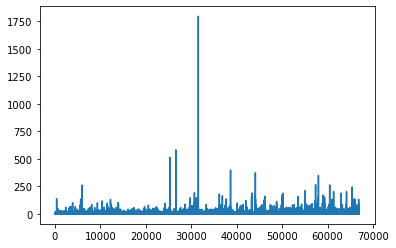

In [5]:
df['Hektar'].plot()

In [6]:
df.drop(columns = ['LanKod', 'KommunKod', 'Hektar']).describe()

,Beteckn,Lan,Kommun,Objnamn,Datinv,Biotop1,Biotop2,Biotop3,Beskrivn1,Beskrivn2,Beskrivn3,Beskrivn4,Beskrivn5,Beskrivn6,Beskrivn7,Beskrivn8,Url
count,66974,66974,66974,56653,66974,66907,16493,351,60235,47317,32946,20487,12015,6697,3664,1764,66974
unique,66974,21,283,49921,7133,55,52,44,84,84,84,83,81,80,80,73,66974
top,N 2-1900,VSTRA GTALANDS LN,GOTLAND,RIDDARHUSET,1996/10/02,Barrskog (BARRSKOG),Bergbrant (BERGBRAN),Barrskog (BARRSKOG),Rikligt med dd ved (DDVED),Rikligt med dd ved (DDVED),Vrdefull kryptogamflora (KRYPTOGA),Vrdefull kryptogamflora (KRYPTOGA),Vrdefull kryptogamflora (KRYPTOGA),Vrdefull kryptogamflora (KRYPTOGA),Vrdefull kryptogamflora (KRYPTOGA),Stora ornitologiska vrden (ORNITOLO),http://www.skogsstyrelsen.se/skogens-parlor/Ny...
freq,1,5999,2858,48,127,10169,1735,39,6751,5293,3396,2367,1466,874,464,198,1


In [7]:
df.Lan.value_counts()

VSTRA GTALANDS LN    5999
VRMLANDS LN          5731
STERGTLANDS LN       5296
DALARNAS LN          4564
STOCKHOLMS LN        4359
JMTLANDS LN          3570
KALMAR LN            3568
NORRBOTTENS LN       3433
JNKPINGS LN          3432
SKNE LN              2949
SDERMANLANDS LN      2947
GOTLANDS LN          2858
VSTERBOTTENS LN      2569
GVLEBORGS LN         2467
KRONOBERGS LN        2269
REBRO LN             2175
UPPSALA LN           2166
VSTERNORRLANDS LN    2092
BLEKINGE LN          1984
HALLANDS LN          1758
VSTMANLANDS LN        788
Name: Lan, dtype: int64

Now lets stack the columns 'Biotop1', 'Biotop2' and 'Biotop3' and all kinds of biotopes they contain

In [8]:
lb = df.loc[:,['Biotop1', 'Biotop2','Biotop3']].stack().value_counts() # Stack(): columns to index.
lb 

Barrskog (BARRSKOG)                      11586
Barrnaturskog (BARRNATU)                  9081
Bergbrant (BERGBRAN)                      5841
dellvtrd (DELTRD)                         4929
Lvrik barrnaturskog (LVBARR)              3421
Gransumpskog (GRANSUMP)                   3038
Lvskogslund (LVLUND)                      2863
Hllmarkskog (HLLSKOG)                     2783
dellvskog (DELSKOG)                       2489
Naturlig skogsbck (SKOGBCK)               2476
Lvngsrest, med hamlade trd (LVREST)       2288
Blandsumpskog (BLANSUMP)                  2168
Rasbrant (RASBRANT)                       2150
Alsumpskog (ALSUMP)                       2083
dellvnaturskog (DELLV)                    1797
Aspskog (ASPSKOG)                         1782
Kalkbarrskog (KALKBARR)                   1724
rtrika bckdrg (BCKDRG)                    1659
Lvsumpskog (LVSUMP)                       1551
Kllpverkad mark (KLLMARK)                 1541
Hagmark (HAGMARK)                         1292
Sekundr lvnat

In [9]:
ld = df.loc[:,['Beskrivn1','Beskrivn2','Beskrivn3','Beskrivn4','Beskrivn5','Beskrivn6','Beskrivn7',
                   'Beskrivn8']].stack().value_counts()
ld.head(15)

Vrdefull kryptogamflora (KRYPTOGA)             16529
Rikligt med dd ved (DDVED)                     16051
Stort inslag av senvuxna trd (SENVUXNA)        12838
Hg och jmn luftfuktighet (HGFUKT)              10818
Sprrgreniga grova trd (SPRGREN)                 9248
Blockrikt eller storblockigt (BLOCMARK)         8152
Rikligt med lgor (LGOR)                         6276
Sj/havsstrand avgrnsar del av obj. (STRAND)     5386
Rikligt med grova trd (GROVSKOG)                4541
Rikligt med dda trd och hgstubbar (DDATRD)      4535
Vrdefull lgre fauna (LGFAUNA)                   4441
Stora ornitologiska vrden (ORNITOLO)            4103
Rik hnglavsfrekomst (HNGLAV)                    3898
Naturskog, urskogsartat objekt (NATUSKOG)       3786
Ansluter till bck,  eller lv (RINNANSL)         3482
dtype: int64

In [10]:
df.dropna(subset= ['Biotop1', 'Biotop2', 'Biotop3'], how= 'all', inplace= True)

## 2. GeoDataFrame

A GeoDataFrame is a data structure in `GeoPandas`. It is basically a `Pandas` DataFrame that has a column with geometry. 

Lets now study **sksNyckelBiotoper** shapefile:
- This shapeful display the **locations** and attributes of key-biotopes in Sweden, i.e. it contains all the data in **attribute_table.csv** + locations of each key-biotope.

- To Do:
1. Read sksNyckelBiotoper shapefile into a GeoDataFrame and explore it.
2. Clean the dataset from key-biotopes that have no habitats registered.

In [11]:
gdf = gpd.read_file('files/sksNyckelbiotoper_shapefiles/sksNyckelBiotoper.shp')

In [12]:
gdf.info()

<class 'geopandas.geodataframe.GeoDataFrame'>
RangeIndex: 66974 entries, 0 to 66973
Data columns (total 21 columns):
 #   Column     Non-Null Count  Dtype   
---  ------     --------------  -----   
 0   Beteckn    66974 non-null  object  
 1   LanKod     66974 non-null  object  
 2   Lan        66974 non-null  object  
 3   KommunKod  66974 non-null  object  
 4   Kommun     66974 non-null  object  
 5   Objnamn    56656 non-null  object  
 6   Hektar     66974 non-null  float64 
 7   Datinv     66974 non-null  object  
 8   Biotop1    66907 non-null  object  
 9   Biotop2    16493 non-null  object  
 10  Biotop3    351 non-null    object  
 11  Beskrivn1  60235 non-null  object  
 12  Beskrivn2  47317 non-null  object  
 13  Beskrivn3  32946 non-null  object  
 14  Beskrivn4  20487 non-null  object  
 15  Beskrivn5  12015 non-null  object  
 16  Beskrivn6  6697 non-null   object  
 17  Beskrivn7  3664 non-null   object  
 18  Beskrivn8  1764 non-null   object  
 19  Url        66974 

In [13]:
gdf.dropna(subset= ['Biotop1', 'Biotop2', 'Biotop3'], how= 'all', inplace= True)

## Ploting on the map

The most relevant information in shapefile is stored in the geometry. The best way to gain some feel of the data is to plot it.
- To Do:
1. Plot all key-biotopes in the shapefile.
2. On the "map" you got in (1), what are the units drawn on x-axis and y-axis?
- Examine the attribute `crs` (coordinate reference system) of the geodataframe.
3. Visualize the key-biotopes over a map of Sweden. Here are two ways for you to do this:
    1. Read sweden_map_shapefiles into a GeoDataFrame, and plot it with the key-biotopes
    2. Make use of module `contextily` to draw a base-map
In both cases make sure your maps have the same coordinate reference system. Geographic coordinate reference systems are identified by EPSG codes, for example sksNyckelBiotoper_shapefiles has the code epsg: 3006.

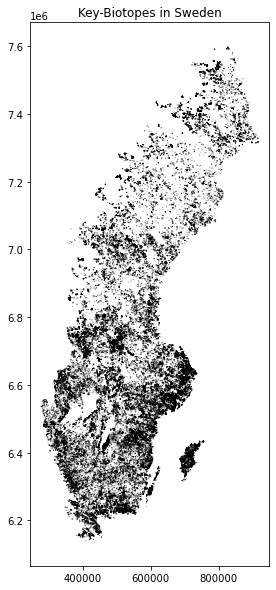

Wall time: 26.9 s


In [14]:
%%time  
# make use of .plot method of geopandas.
ax = gdf.plot(figsize = (5,10), color = 'k', edgecolor= 'k', )
ax.set_title('Key-Biotopes in Sweden')
plt.show()

In [15]:
gdf.crs

<Projected CRS: EPSG:3006>
Name: SWEREF99 TM
Axis Info [cartesian]:
- N[north]: Northing (metre)
- E[east]: Easting (metre)
Area of Use:
- name: Sweden - onshore and offshore.
- bounds: (10.03, 54.96, 24.17, 69.07)
Coordinate Operation:
- name: SWEREF99 TM
- method: Transverse Mercator
Datum: SWEREF99
- Ellipsoid: GRS 1980
- Prime Meridian: Greenwich

In [16]:
sweden_map = gpd.read_file('files/sweden_map_shapefiles/sweden_map.shp')
print(sweden_map.crs)

epsg:3006


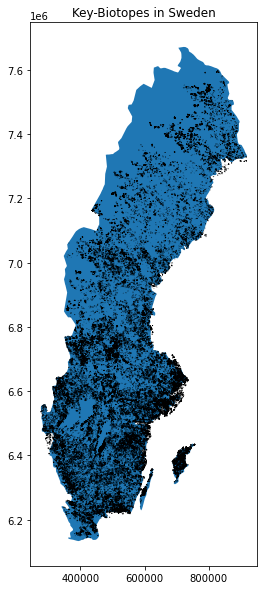

Wall time: 24.4 s


In [17]:
%%time  
# make use of .plot method of geopandas.
ax = sweden_map.plot(figsize = (5,10))
gdf.plot(ax = ax, color = 'k', edgecolor= 'k')
ax.set_title('Key-Biotopes in Sweden')
plt.show()

In [18]:
import contextily as ctx

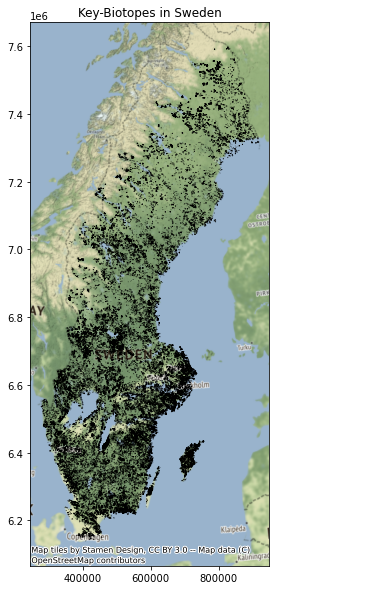

Wall time: 43.3 s


In [19]:
%%time  
# make use of .plot method of geopandas.
ax = gdf.plot(figsize = (5,10), color = 'k', edgecolor= 'k', )
ctx.add_basemap(ax,crs='epsg:3006')

ax.set_title('Key-Biotopes in Sweden')
plt.show()

# Groupings

We have seen that key-biotopes contain habitats that are grouped into approximately 50 different types. However, for a general analysis, it might be beneficial to consolidate these types into a fewer groups. One example of such grouping is provided in 'grouping_of_biotopes.csv'.

- To Do:
1. Read **'grouping_of_biotopes.csv'** using `Pandas` tools. Get a dictionary for transforming each habitat type to the corresponding habitat group.
2. Transform habitat types in the 3 columns 'Biotop1', 'Biotop2' and 'Biotop3' to their corresponding habitat groups. Add 3 new columns 'BioGrp1', 'BioGrp2' and 'BioGrp3' to hold these groups.
3. Find the most common habitat-group in the key-biotopes. Avoid double counting.
4. (Bonus) Visualize the distribution of the top 5 habitat-group on the map. Where is the distribution of deciduous hardwood forests (Ädellövskogar) concentrated? How does its distribution compare to that of coniferous forests (Barrskogar)?

In [20]:
grouping = pd.read_csv('files/grouping_of_biotopes.csv', delimiter=';')

In [21]:
grouping.Biotopgruppering.unique()

array(['Barrskogar', 'Barrsumpskogar', 'Brandfält', 'Hagmarker',
       'Kalkmarksskogar', 'Lundar', 'Lövsumpskogar', 'Skogsbete',
       'Topografiska', 'Triviallövskogar', 'Vatten', 'Ädellövskogar'],
      dtype=object)

In [22]:
grouping_transform = dict(zip(grouping.Biotoptyp, grouping.Biotopgruppering))
grouping_transform

{'Barrnaturskog (BARRNATU)': 'Barrskogar',
 'Barrskog (BARRSKOG)': 'Barrskogar',
 'Barrträd (BARRTRÄD)': 'Barrskogar',
 'Bestånd med idegran (IDEBEST)': 'Barrskogar',
 'Lövrik barrnaturskog (LÖVBARR)': 'Barrskogar',
 'Lövrik barrskog (LÖVRIKBA)': 'Barrskogar',
 'Sandbarrskog (SANDBARR)': 'Barrskogar',
 'Åsgranskog (ÅSGRAN)': 'Barrskogar',
 'Blandsumpskog (BLANSUMP)': 'Barrsumpskogar',
 'Gransumpskog (GRANSUMP)': 'Barrsumpskogar',
 'Myr- och skogsmosaik (MYRMOSAI)': 'Barrsumpskogar',
 'Tallsumpskog (TALLSUMP)': 'Barrsumpskogar',
 'Brandfält (BRANFÄLT)': 'Brandfält',
 'Fuktig ängsmark (FUKTÄNG)': 'Hagmarker',
 'Hagmark (HAGMARK)': 'Hagmarker',
 'Löväng (LÖVÄNG)': 'Hagmarker',
 'Kalkbarrskog (KALKBARR)': 'Kalkmarksskogar',
 'Kalklövskog (KALKLÖV)': 'Kalkmarksskogar',
 'Hassellund (HASSLUND)': 'Lundar',
 'Lövskogslund (LÖVLUND)': 'Lundar',
 'Lövträdsrika skogsbryn (SKOGBRYN)': 'Lundar',
 'Lövängsrest, med hamlade träd (LÖVREST)': 'Lundar',
 'Örtrik allund (ALLUND)': 'Lundar',
 'Alsumpskog 

In [23]:
gdf[['BioGrp1', 'BioGrp2', 'BioGrp3']] = gdf.loc[:,['Biotop1', 'Biotop2', 'Biotop3']].replace(grouping_transform)

In [24]:
gdf.loc[gdf.BioGrp1 == gdf.BioGrp2, 'BioGrp2'] = np.nan
gdf.loc[gdf.BioGrp1 == gdf.BioGrp3, 'BioGrp3'] = np.nan
gdf.loc[gdf.BioGrp2 == gdf.BioGrp3, 'BioGrp3'] = np.nan

In [25]:
gb = gdf.loc[:,['BioGrp1', 'BioGrp2','BioGrp3']].stack().value_counts() # Stack(): columns to index.
gb 

Barrskogar                                 24224
Topografiska                               11200
Ädellövskogar                              10963
Vatten                                      8525
Barrsumpskogar                              6436
Lundar                                      6291
Triviallövskogar                            4913
Lövsumpskogar                               3684
Kalkmarksskogar                             1818
Hagmarker                                   1519
Skogsbete                                    819
Brandfält                                    429
Lövskogslund/Hagmarksskog (LÖVLUND_ONV)        1
Å eller bäckmiljö (ÅBÄCK_ONV)                  1
dtype: int64

In [26]:
# The 5 most common habitat groups are
common_hab = gb[:5].index.to_list()
common_hab

['Barrskogar', 'Topografiska', 'Ädellövskogar', 'Vatten', 'Barrsumpskogar']

In [27]:
# To visualize the distribution of habitat groups, we can plot a point of a particular color in each location a habitat is
# observed.
points_gdf = gpd.GeoDataFrame(data = gdf.loc[:, ['Beteckn', 'BioGrp1', 'BioGrp2', 'BioGrp3']], 
                              geometry= gdf.loc[:,'geometry'].apply(lambda poly : poly.centroid))

In [28]:
def split(geodf, habitat):
    return geodf[(geodf.BioGrp1 == habitat)|(geodf.BioGrp2 == habitat)|(geodf.BioGrp3 == habitat)]

In [29]:
colormap =  dict(zip(common_hab, ['olive', 'darkgreen', 'yellow' , 'tab:blue', 'orangered']))
colormap

{'Barrskogar': 'olive',
 'Topografiska': 'darkgreen',
 'Ädellövskogar': 'yellow',
 'Vatten': 'tab:blue',
 'Barrsumpskogar': 'orangered'}

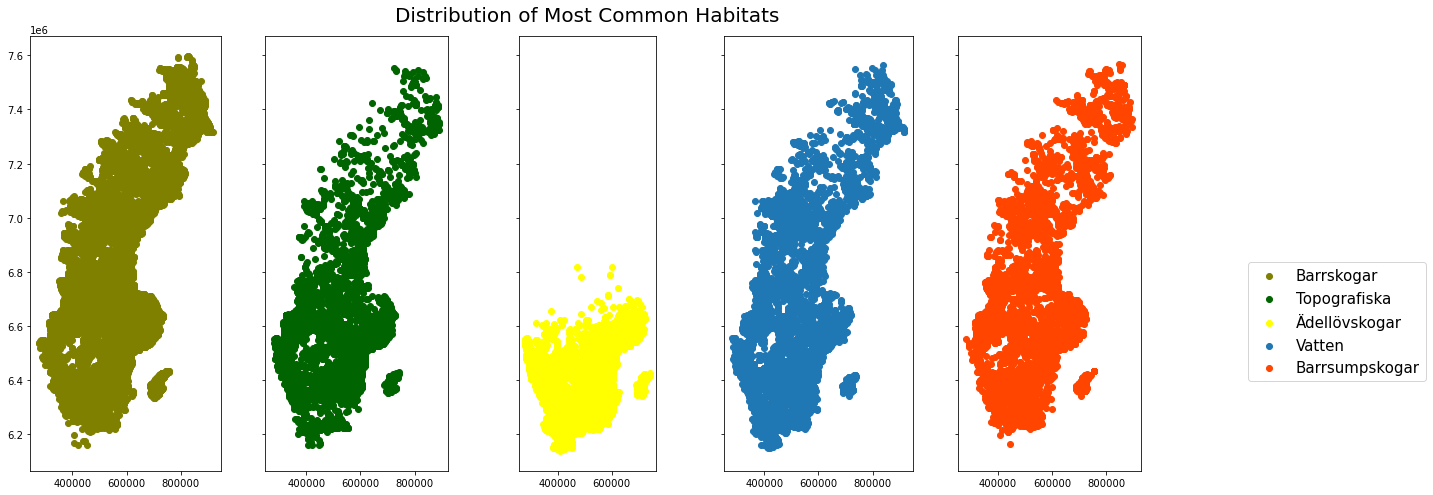

In [30]:
fig, axes = plt.subplots(1,5, figsize = (20,8), sharey = 'row')

i = 0
for habitat in common_hab:
    color = colormap[habitat]
    split(points_gdf, habitat).plot(ax = axes[i], color = color, label = habitat)
    i += 1
    
fig.legend(bbox_to_anchor = (1.1, 0.5), fontsize = 15)
axes[2].set_title('Distribution of Most Common Habitats', y = 1.02, fontdict = {'fontsize': 20})
plt.show()

# Write

In next exercises we will aim to analyse key-biotopes which contain certain habitat groups. Lets write the GeoDataFrame that include habitat groups for each key-biotopes into a shapefile and keep it for later analysis.

- To Do:
1.  Write the GeoDataFrame resulting from the previous section into a shapefile called 'keybiotopes_habitatgroups.shp'

- To Do:
1.  Write the GeoDataFrame resulting from the previous section into a shapefile called 'keybiotopes_habitatgroups.shp'

In [31]:
gdf.to_file('files/keybiotopes_habitatgroups_shapefiles/keybiotopes_habitatgroups.shp')